## Taller Ancho de Banda


 Suponga que se desea transmitir un mensaje consistente en una corriente de 1s y 0s a través de un canal de comunicaciones _*Pasabajo*_  limitado en 12MHz a una velocidad de trnansmisión de R= 10 Mb/s = 1/Tb.
 
 Hay dos formas de codificar la señal: NRZ y Unipolar RZ.
 
 1. Dibujar el espectro de frecuencia de ambas señales usando 4 armónicos min.
 2. Representación en S. de Fourier de las 2 señales usando los 4 primeros armónicos.
 3. Si el ancho de banda de las señales se forma como el rango de frecuencia que contiene el 90% de la potencia de las señales, será posible transmitir sin pérdidas de info ambas, ninguna o una de las señales a través del canal?
 4. Desde el p. de vista de la potencia, cuál de los 2 métodos de codifiación es el mejor? ¿Por qué es importante la potencia de una señal? Explique. SETI@home
 
 _NOTA_ Tb= Duración de 1 bit y no corresponde al periodo de las señales mostradas.
 

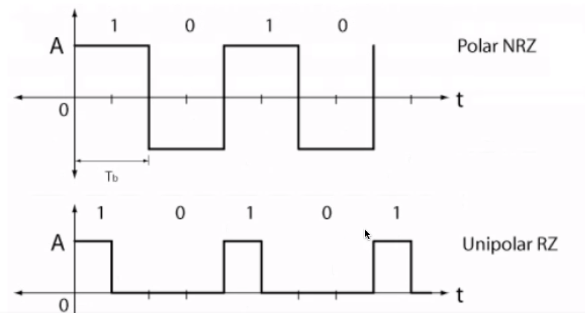

In [1]:
%matplotlib inline
from sympy import symbols, integrate, pi, exp, simplify, pprint, cos, sin, plot, Abs
from numpy import arange
import matplotlib
import matplotlib.pyplot as plt

# Symbols definition:

A = symbols('A', constant=True)
n = symbols('n', integer=True, positive= True)
t = symbols('t') # real value

# constantes del problema

Tb  = 1/10e6
T = 2*Tb
w0 = 2* pi/T



# Para la señal Polar NRZ

# Serie trigonomética de Fourier

 Esta señal tiene $ a_0 = 0 $  (se compensan las áreas) , y como es impar, $ a_n =  0 $

$$ a_0 = \frac {1}{T} \int _{t_0} ^{t_0 + t} f(t) dt $$ 

In [2]:
a0 = 1/T *(integrate(A, (t, 0, T/2)) + integrate(-A, (t, T/2, T))  )
a0

0

$$ a_n = \frac {2}{T} \int _{t_0} ^{t_0 + t} f(t) \cos(nw_0t) dt $$ 

In [3]:
an = 2/T *(integrate(A*cos(n*w0*t), (t, 0, T/2)) + integrate(-A*cos(n*w0*t), (t, T/2, T))  )
an


0

$$ b_n = \frac {2}{T} \int _{t_0} ^{t_0 + t} f(t) \sin(nw_0t) dt $$

In [4]:
bn = 2/T *(integrate(A*sin(n*w0*t), (t, 0, T/2)) + integrate(-A*sin(n*w0*t), (t, T/2, T))  )
simplify(bn)

2.0*A*(1 - (-1)**n)/(pi*n)

In [5]:
harmonics = 8
ft = a0

for h in range(1, harmonics +1):
    ft+= (an *cos(n*w0*t) + bn*sin(n*w0*t)).subs(n, h)
    
pprint(ft)

4.0⋅A⋅sin(10000000⋅π⋅t)   1.33333333333333⋅A⋅sin(30000000⋅π⋅t)   0.8⋅A⋅sin(500
─────────────────────── + ──────────────────────────────────── + ─────────────
           π                               π                                π 

00000⋅π⋅t)   0.571428571428571⋅A⋅sin(70000000⋅π⋅t)
────────── + ─────────────────────────────────────
                               π                  


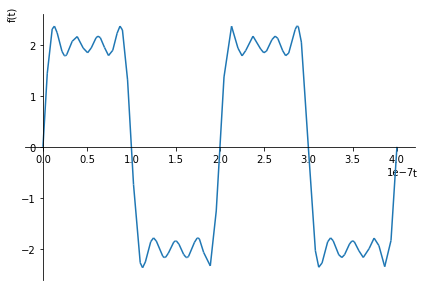

In [6]:
plot(ft.subs(A,2),(t,0,2*T))

#### That graphic should look like this :C

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b3/Gibbs_phenomenon_50.svg/800px-Gibbs_phenomenon_50.svg.png?1590030094998" width= "50%"> 

# Serie exponencial de Fourier
A continuación se realiza la misma solución de la serie de Fourier, usando la serie exponencial de Fourier 


(Potencia relativa):

$$ f(t)= \sum _{n= -\infty} ^{n= \infty} c_n e^{jnw_0t}  $$

$$ c_n = \frac {1}{T} \int _{t_0} ^{t_0 + t} f(t) e^{-jnw_0t} dt $$ 

In [7]:
cn = (A/T) * (integrate(exp(-1j*n*w0*t), (t, 0, T/2)) - integrate(exp(-1j*n*w0*t), (t, T/2, T)))

pprint(simplify(cn))

        n + 1/2            
1.0⋅(-1)       ⋅A   1.0⋅ⅈ⋅A
───────────────── - ───────
       π⋅n            π⋅n  


Es decir, $$ c_n = \frac {-jA}{\pi n}( 1 - (-1)^n )  ,  c_n = \frac {a_n - jb_n}{2} ,c_0 = \frac{a_0}{2}  $$

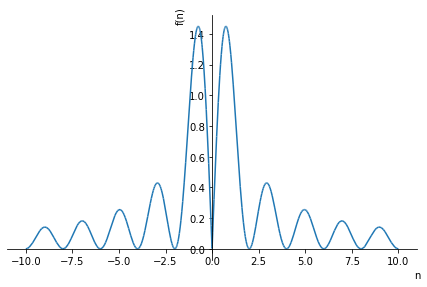

In [8]:
plot(abs(cn.subs(A,2))) 

In [9]:
cn = 1/T *(integrate(A*exp(-1j*n*w0*t), (t, 0, T/2)) + integrate(-A*exp(-1j*n*w0*t), (t, T/2, T))  )
simplify(bn)

2.0*A*(1 - (-1)**n)/(pi*n)

# Energía (Potencia para señal periódica) promedio de una señal en un Periodo

(Potencia Promedio En Un Periodo. 100 De La  potencia):
$$ potencia = \frac {1}{T} \int _{t_0} ^{t_0 + t} |f(t)|^2 dt $$ 

(Potencia relativa):

$$= \sum _{n= -\infty} ^{n= \infty} |c_n|^2  $$

 Nota: lo que se quiere hacer para encontrar el  0.9 de la potencia es: hacer la integral para encontrar la potencia total, y después utilizar la sumatoria para empezar a sumar los términos C_n hasta que me de el 0.9 de la potencia. Con se último término Cn se encuentra el ancho de banda :D

In [14]:
potencia = (A**2/T)* integrate(1, (t, 0, T))
pprint(potencia.subs(A,2))

4.00000000000000


In [16]:
# Los cn que representan el 90% (Aproximadamente 3.6) de la señal son:
c1 = 1.4
c2 = 0.4
c3 = 0.23

pprint(2*c1**2) # en las primeras c_-1, c_1 se encuentra concentrado más del 90% de la seña 

3.9199999999999995


potencia <= Co^2 + 2(C1^2 + C2^2 + C3^2 + ... + Cn^2)

# Polar RZ

# Serie trigonométrica

In [17]:
 # Esta señal tiene componentes a0, an y bn , porque no es ni par ni impar
    

In [24]:
a02 = 1/T *(integrate(A, (t, 0, T/4)) )
a02

0.25*A

In [25]:
an2 = 2/T *(integrate(A*cos(n*w0*t), (t, 0, T/4))   )
simplify(an2)

1.0*A*sin(pi*n/2)/(pi*n)

In [26]:
bn2 = 2/T *(integrate(A*sin(n*w0*t), (t, 0, T/4))   )
simplify(bn2)

1.0*A*(1 - cos(pi*n/2))/(pi*n)

In [27]:
harmonics = 8
ft2 = a0

for h in range(1, harmonics +1):
    ft2+= (an *cos(n*w0*t) + bn*sin(n*w0*t)).subs(n, h)
    
pprint(ft2)

1.0⋅A⋅sin(10000000⋅π⋅t)   1.0⋅A⋅sin(20000000⋅π⋅t)   0.333333333333333⋅A⋅sin(30
─────────────────────── + ─────────────────────── + ──────────────────────────
           π                         π                                π       

000000⋅π⋅t)   0.2⋅A⋅sin(50000000⋅π⋅t)   0.333333333333333⋅A⋅sin(60000000⋅π⋅t) 
─────────── + ─────────────────────── + ───────────────────────────────────── 
                         π                                π                   

  0.142857142857143⋅A⋅sin(70000000⋅π⋅t)   1.0⋅A⋅cos(10000000⋅π⋅t)   0.33333333
+ ───────────────────────────────────── + ─────────────────────── - ──────────
                    π                                π                        

3333333⋅A⋅cos(30000000⋅π⋅t)   0.2⋅A⋅cos(50000000⋅π⋅t)   0.142857142857143⋅A⋅co
─────────────────────────── + ─────────────────────── - ──────────────────────
        π                                π                                π   

s(70000000⋅π⋅t)
───────────────
               


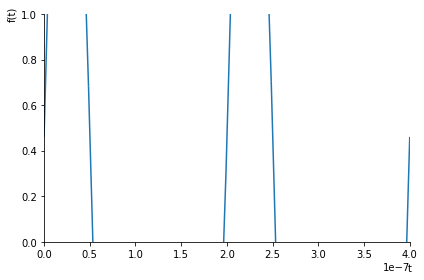

In [28]:
plot(ft2.subs(A,2),(t,0,2*T))

# Serie exponencial

In [36]:
cn2 = (A/T) * (integrate(exp(-1j*n*w0*t), (t, 0, T/4)) )

pprint(simplify(cn2))

                     -0.5⋅ⅈ⋅π⋅n
  0.5⋅ⅈ⋅A   0.5⋅ⅈ⋅A⋅ℯ          
- ─────── + ───────────────────
    π⋅n             π⋅n        


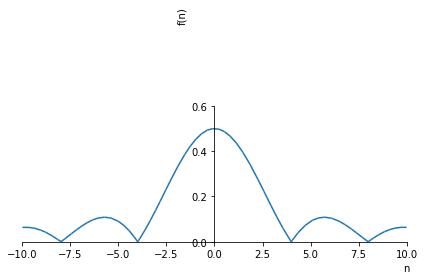

In [38]:
plot(Abs(cn2.subs(A,2))) 

# Potencia

In [39]:
potencia2 = (A**2/T)* integrate(1, (t, 0, T/4))
pprint(potencia2.subs(A,2))

1.00000000000000


In [42]:
c0 = 0.5
c1 = 0.4
c2 = 0.3
c3 = 0.15
c4 =  0
c5 = 0.08
c6 = 0.08
c7 = 0
c8 = 0.12

pprint(c0**2 + 2*(c1**2 + c2**2 + c3**2 + c4**2 + c5**2 + c6**2 + c8**2 ) ) # debería tener por lo menos 0.9 

0.8494000000000002


##### Conclusión:
El método de codificación más efectivo es el Polar NRZ, ya que la potencia de la señal se concentra en el primer armónico